In [1]:
from afml.Chapter_2 import *
from afml.Chapter_3 import *
from afml.Chapter_4 import *
from afml.Chapter_6 import *
from afml.Chapter_7 import *
from afml.Chapter_20 import *
import os
import matplotlib.pyplot as plt

In [2]:
txt_path = r'C:\Users\jaehkim\Desktop\tick data'
df = pd.read_csv(os.path.join(txt_path, 'S&P_data.csv'), parse_dates=['dates'])
df.set_index('dates', inplace=True)
assert not (True in df.index.duplicated())
df = df.loc[~mad_outlier(df.price.values.reshape(-1,1))]
dollar_df, (unit, std) = get_bar_df(df, 'dollar', 1_000_000)

In [3]:
print (dollar_df, unit, std)

                          price     bid     ask  size  volume      dollar
dates                                                                    
2009-09-28 09:46:35.001   51.07   51.05   51.07   900     900    45963.00
2009-09-28 09:53:49.000   51.13   51.13   51.14   500     500    25565.00
2009-09-28 09:54:40.000   51.14   51.13   51.14  1100    1100    56254.00
2009-09-28 10:00:38.000   51.21   51.20   51.23   200     200    10242.00
2009-09-28 10:02:52.009   51.26   51.25   51.26   900     900    46134.00
...                         ...     ...     ...   ...     ...         ...
2021-02-18 15:56:12.000  133.96  133.96  133.97   100     100    13396.00
2021-02-18 15:56:43.001  133.95  133.95  133.96   278     278    37238.10
2021-02-18 15:58:29.001  133.94  133.93  133.94   100     100    13394.00
2021-02-18 15:59:57.000  133.92  133.90  133.92   100     100    13392.00
2021-02-18 16:00:00.000  133.92  133.92  133.99  9253    9253  1239161.76

[116443 rows x 6 columns] 1000000 361

In [4]:
price = dollar_df.price.copy(deep=True)

In [5]:
dailyVol = getDailyVol(price)
tEvents = getTEvents(np.log(price), upper=np.log(1+dailyVol.mean()), lower=np.log(1-dailyVol.mean()))
tl = addVerticalBarrier(tEvents, price,10)
target = dailyVol

In [6]:
print(f'daily volatility: \n {dailyVol} \n \n sampled datetime index: \n {tEvents} \n time limit: \n {tl}')

daily volatility: 
 dates
2009-09-29 09:59:17.000         NaN
2009-09-29 10:02:46.000    0.006769
2009-09-29 10:17:36.003    0.004770
2009-09-29 10:37:49.001    0.003988
2009-09-29 10:51:20.000    0.003529
                             ...   
2021-02-18 15:56:12.000    0.002619
2021-02-18 15:56:43.001    0.002624
2021-02-18 15:58:29.001    0.002629
2021-02-18 15:59:57.000    0.002630
2021-02-18 16:00:00.000    0.002630
Name: price, Length: 116408, dtype: float64 
 
 sampled datetime index: 
 DatetimeIndex(['2009-09-28 11:51:21.001000',        '2009-09-29 09:31:28',
                      '2009-09-29 09:59:17',        '2009-09-30 09:31:59',
               '2009-09-30 09:52:49.002000',        '2009-09-30 11:58:47',
                      '2009-09-30 14:47:14',        '2009-10-01 09:34:04',
                      '2009-10-01 10:59:37',        '2009-10-01 15:45:52',
               ...
                      '2021-02-08 09:38:48', '2021-02-09 15:59:55.003000',
                      '2021-02-10 1

In [7]:
numThreads = 1
events = getEvents(price, tEvents, ptSl=[1,1], trgt=target, minRet=0.001, numThreads=numThreads, tl=tl, side=None)
out = getBins(events, price)

In [8]:
print(f'events: \n {events} \n label: \n {out}')

events: 
                                              tl      trgt
dates                                                    
2009-09-30 09:31:59.000 2009-09-30 09:43:53.000  0.004568
2009-09-30 09:52:49.002 2009-09-30 13:07:21.003  0.007220
2009-09-30 11:58:47.000 2009-10-01 10:00:31.004  0.008810
2009-09-30 14:47:14.000 2009-09-30 15:16:01.000  0.008050
2009-10-01 09:34:04.000 2009-10-01 10:10:20.001  0.007492
...                                         ...       ...
2021-02-12 09:33:14.000 2021-02-12 15:54:40.000  0.003997
2021-02-12 16:00:00.000 2021-02-16 09:30:00.000  0.003289
2021-02-17 09:33:25.000 2021-02-17 10:14:22.000  0.003357
2021-02-17 13:56:14.000 2021-02-18 09:45:03.003  0.002826
2021-02-18 09:54:33.000 2021-02-18 14:39:22.002  0.002757

[5155 rows x 2 columns] 
 label: 
                               ret  bin
dates                                 
2009-09-30 09:31:59.000 -0.005420 -1.0
2009-09-30 09:52:49.002  0.008622  1.0
2009-09-30 11:58:47.000 -0.009988 -1.0
2009-

In [9]:
print(getBins(getEvents(price, tEvents, ptSl=[1,1], trgt=target, minRet=0.001, numThreads=numThreads, tl=tl, side=out.bin), price).bin.value_counts())

1.0    5155
Name: bin, dtype: int64


In [10]:
dataset = pd.concat([get_ohlc(df.price, price.loc[tEvents]), out.bin], axis=1).dropna(subset=['bin'])

100%|████████████████████████████████████████████████████████████████████████████| 5158/5158 [00:03<00:00, 1671.81it/s]


In [11]:
print(f'dataset: \n {dataset}')

dataset: 
                            price     high      low  bin
2009-09-30 09:31:59.000   51.660   51.660   50.940 -1.0
2009-09-30 09:52:49.002   51.030   51.076   50.780  1.0
2009-09-30 11:58:47.000   51.060   51.530   50.990 -1.0
2009-09-30 14:47:14.000   51.436   51.436   50.920 -1.0
2009-10-01 09:34:04.000   50.930   50.980   50.460 -1.0
...                          ...      ...      ...  ...
2021-02-12 09:33:14.000  133.280  133.850  133.180  1.0
2021-02-12 16:00:00.000  133.770  134.455  133.500  1.0
2021-02-17 09:33:25.000  133.570  134.230  133.225  1.0
2021-02-17 13:56:14.000  134.190  134.600  133.640 -1.0
2021-02-18 09:54:33.000  133.780  134.215  133.290  1.0

[5155 rows x 4 columns]


In [12]:
numCoEvents = mpPandasObj(func=mpNumCoEvents, pdObj=('molecule', events.index), numThreads=numThreads, priceIdx=price.index, tl=events['tl'])
sampleTw = mpPandasObj(func=mpSampleTW, pdObj=('molecule', events.index), numThreads=numThreads, tl=events['tl'], numCoEvents=numCoEvents)

In [13]:
print(f'number of concurrent events at time t for each t in price.index: \n {numCoEvents} \n uniqueness score for sample i for each i in tEvents: \n {sampleTw}')

number of concurrent events at time t for each t in price.index: 
 2009-09-30 09:31:59.000    1
2009-09-30 09:43:53.000    1
2009-09-30 09:52:49.002    1
2009-09-30 10:03:45.000    1
2009-09-30 10:25:09.000    1
                          ..
2021-02-18 13:39:40.000    1
2021-02-18 14:05:17.000    1
2021-02-18 14:09:22.000    1
2021-02-18 14:23:23.000    1
2021-02-18 14:39:22.002    1
Length: 116378, dtype: int64 
 uniqueness score for sample i for each i in tEvents: 
 2009-09-30 09:31:59.000    1.000000
2009-09-30 09:52:49.002    0.812500
2009-09-30 11:58:47.000    0.676471
2009-09-30 14:47:14.000    0.500000
2009-10-01 09:34:04.000    0.687500
                             ...   
2021-02-12 09:33:14.000    0.890476
2021-02-12 16:00:00.000    1.000000
2021-02-17 09:33:25.000    1.000000
2021-02-17 13:56:14.000    1.000000
2021-02-18 09:54:33.000    1.000000
Length: 5155, dtype: float64


count    5155.000000
mean        0.543316
std         0.325539
min         0.032544
25%         0.250000
50%         0.500000
75%         0.900000
max         1.000000
dtype: float64

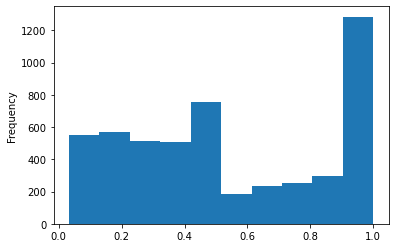

In [14]:
sampleTw.plot.hist()
sampleTw.describe()

In [15]:
sample_weight = pd.Series(name='weight', dtype=float)
sample_weight = mpPandasObj(func=mpSampleW, pdObj=('molecule', events.index), numThreads=numThreads, tl=events['tl'], numCoEvents=numCoEvents, price=price)
sample_weight = sample_weight*sample_weight.shape[0]/sample_weight.sum()

In [16]:
print(sample_weight)

2009-09-30 09:31:59.000    0.528553
2009-09-30 09:52:49.002    0.509501
2009-09-30 11:58:47.000    1.019648
2009-09-30 14:47:14.000    0.735543
2009-10-01 09:34:04.000    1.514947
                             ...   
2021-02-12 09:33:14.000    0.607905
2021-02-12 16:00:00.000    1.165858
2021-02-17 09:33:25.000    0.609113
2021-02-17 13:56:14.000    0.727634
2021-02-18 09:54:33.000    0.862750
Length: 5155, dtype: float64


In [17]:
print(False in sample_weight.index == dataset.index == events['tl'].index, len(sample_weight))

False 5155


In [18]:
split_year = '2019'
score = sampleTw
training_sample_weight, test_sample_weight = sample_weight.loc[:str(int(split_year)-1)], sample_weight.loc[split_year:]
training_set, test_set = dataset.loc[:str(int(split_year)-1)], dataset.loc[split_year:]

In [19]:
clf = bagging(2, n_estimators=1000, max_samples=score.mean(), oob_score=True)
clf.fit(X=training_set.iloc[:,:-1], y=training_set.iloc[:,-1], sample_weight=training_sample_weight)

BaggingClassifier(base_estimator=RandomForestClassifier(bootstrap=False,
                                                        class_weight='balanced_subsample',
                                                        criterion='entropy',
                                                        n_estimators=1),
                  max_samples=0.5433160226279922, n_estimators=1000,
                  oob_score=True)

In [20]:
print(f'out-of-bag sample score: {clf.oob_score_}')
print(f'train data accuracy: {clf.score(X=training_set.iloc[:,:-1], y=training_set.iloc[:,-1], sample_weight=training_sample_weight)}')
print(f'test data accuracy: {clf.score(X=test_set.iloc[:,:-1], y=test_set.iloc[:,-1], sample_weight=test_sample_weight)}')

out-of-bag sample score: 0.70030666294954
train data accuracy: 0.9861598295155098
test data accuracy: 0.6690202798680583


In [21]:
from sklearn.metrics import precision_recall_fscore_support
labels=[-1,1]
y_pred = clf.predict(X=test_set.iloc[:,:-1])
print(test_set.iloc[:,-1].value_counts())
p, r, f, s = precision_recall_fscore_support(y_true=test_set.iloc[:,-1], y_pred=y_pred, labels=labels)
for result in zip(labels,p,r,f,s):
    print(f'label {result[0]}: \n precision, recall, f_score, support: {result[1:]}')

 1.0    840
-1.0    728
Name: bin, dtype: int64
label -1: 
 precision, recall, f_score, support: (0.6339144215530903, 0.5494505494505495, 0.5886681383370125, 728)
label 1: 
 precision, recall, f_score, support: (0.6499466382070438, 0.725, 0.6854248733821048, 840)


In [22]:
print(len(training_set)+len(test_set)==dataset.shape[0], training_set, test_set)

True                             price     high     low  bin
2009-09-30 09:31:59.000   51.6600   51.660   50.94 -1.0
2009-09-30 09:52:49.002   51.0300   51.076   50.78  1.0
2009-09-30 11:58:47.000   51.0600   51.530   50.99 -1.0
2009-09-30 14:47:14.000   51.4360   51.436   50.92 -1.0
2009-10-01 09:34:04.000   50.9300   50.980   50.46 -1.0
...                           ...      ...     ...  ...
2018-12-31 10:55:46.000  100.5151  100.775  100.10  1.0
2018-12-31 12:37:03.000  100.7137  101.060  100.27 -1.0
2018-12-31 14:34:13.001  100.3500  101.000  100.23  1.0
2018-12-31 15:43:49.001  100.9200  101.140  100.40 -1.0
2018-12-31 16:13:26.000  101.1153  101.140   99.56 -1.0

[3587 rows x 4 columns]                            price     high      low  bin
2019-01-02 10:04:30.000  100.223  101.150  100.223  1.0
2019-01-02 11:03:11.002  101.000  101.690  100.950  1.0
2019-01-02 13:05:17.020  101.680  101.910  101.200 -1.0
2019-01-02 15:07:03.000  101.250  101.630  100.930 -1.0
2019-01-02 16:00:0

In [23]:
for n_split in range(2,11):
    print(cvScore(clf, X=dataset.iloc[:,:-1], y=dataset.iloc[:,-1], sample_weight=sample_weight, tl=events['tl'], cv=n_split, pctEmbargo=0.01))

  0%|                                                                                            | 0/3 [00:00<?, ?it/s]

[0.54791795 0.54717102]


  0%|                                                                                            | 0/4 [00:00<?, ?it/s]

[0.53193574 0.60255377 0.64364247]


  0%|                                                                                            | 0/5 [00:00<?, ?it/s]

[0.54794863 0.60812798 0.67373295 0.65599365]


  0%|                                                                                            | 0/6 [00:00<?, ?it/s]

[0.58263684 0.63943472 0.65774378 0.67786685 0.68763786]


  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

[0.61845956 0.65465828 0.59599872 0.70155137 0.67368768 0.69502339]


  0%|                                                                                            | 0/8 [00:00<?, ?it/s]

[0.69581126 0.66186652 0.62627191 0.69224016 0.67866067 0.68425833
 0.69093895]


  0%|                                                                                            | 0/9 [00:00<?, ?it/s]

[0.62766393 0.66290172 0.64591718 0.66775392 0.71129045 0.72710189
 0.67014688 0.72237422]


  0%|                                                                                           | 0/10 [00:00<?, ?it/s]

[0.62331427 0.68672656 0.65690108 0.67156831 0.70547439 0.70803731
 0.71616762 0.65117447 0.7160179 ]


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [02:07<00:00, 12.80s/it]

[0.71653053 0.69323809 0.63260861 0.59624242 0.71478958 0.71355295
 0.71018238 0.72072081 0.64343481 0.71279425]
